# Gaussian experiment
All data is generated on the fly

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

In [2]:
dim = 6
M = int(2**10)
parameters = np.random.normal(0, 1, (M,dim))

def functional(x):
    return np.sum(np.sin(4*np.sin(x)), 1)

samples = functional(parameters)

gaussian_network =  [12, 12, 10, 12, 10, 12, 10, 10, 10, 12, 12,1]

epochs = 500000



# Small test of data

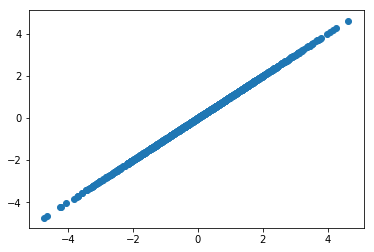

In [3]:
plt.scatter(samples, functional(parameters))

# Training


Training took 508.60663294792175 seconds


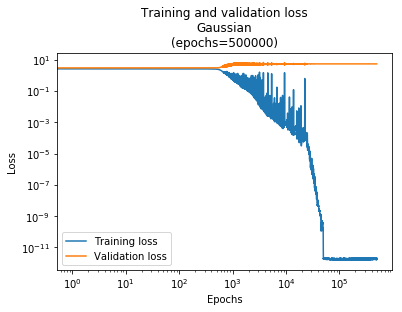


Training took 515.1732487678528 seconds


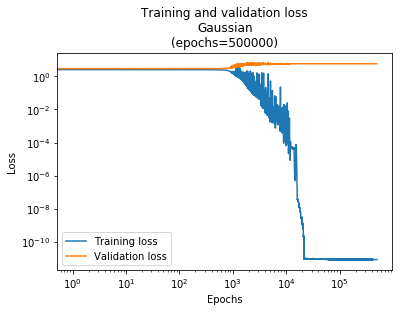

In [ ]:

train_sizes = [ 128, 256, 512, 1024]

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}

losses = ["mean_squared_error", "mean_absolute_error"]

for optimizer in optimizers.keys():
    for loss in losses:
        display(HTML("<h1>{} with {}</h1>".format(optimizer, loss)))


        for train_size in train_sizes:
            batch_size = train_size
            validation_size=train_size
            tables = Tables.make_default()
            
            
            network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                         network=gaussian_network, train_size=train_size,
                                                         validation_size=validation_size,
                                                        loss=loss)
                
            output_information = OutputInformation(tables=tables, title='Gaussian',
                                                      short_title='Gaussian')
            showAndSave.prefix='gaussian_%s_%s_ts_%d_bs_%d' %(optimizer, loss, batch_size, train_size)
            get_network_and_postprocess(parameters, samples, network_information = network_information,
                    output_information = output_information)
            
            showAndSave.prefix='gaussian_%s_%s_all_ts_%d_bs_%d' %(optimizer, loss, batch_size, train_size)
            tables.write_tables()
        
